In [2]:
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt

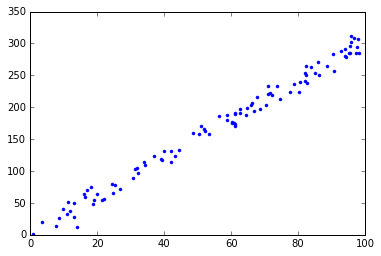

In [14]:
x = np.random.uniform(0., 100., 100)
y = 3. * x + 2. + np.random.normal(0., 10., 100)
plt.plot(x, y, '.')

In [10]:
def line(x, a, b):
    return a * x + b

In [17]:
def line2(x, a, b, c):
    return a*x*x + b*x + c

In [24]:
popt, pcov = curve_fit(line, x, y)

In [25]:
popt

array([ 3.01157673,  2.06809651])

In [26]:
pcov

array([[  1.21738319e-03,  -6.78784427e-02],
       [ -6.78784427e-02,   4.79725350e+00]])

In [22]:
popt2, pcov2 = curve_fit(line2, x, y)

In [23]:
popt2

array([  2.84822504e-04,   2.98148896e+00,   2.62334065e+00])

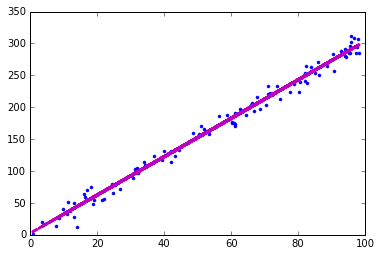

In [30]:
plt.plot(x, y, '.')
plt.plot(x, line(x, popt[0], popt[1]), 'r-')
plt.plot(x, line2(x, popt2[0], popt2[1], popt2[2]), 'm--', lw=3)

In [31]:
from astropy.table import Table

In [79]:
lf = Table.read('lumfunc2.1', format='ascii')
m, phi = lf['col1'].data, lf['col2'].data
m, phi

(array([-22.96, -22.84, -22.73, -22.64, -22.54, -22.43, -22.34, -22.24,
        -22.14, -22.04, -21.94, -21.85, -21.75, -21.64, -21.53]),
 array([  1.39900000e-06,   2.07700000e-06,   3.59300000e-06,
          6.03100000e-06,   8.95400000e-06,   1.69700000e-05,
          2.37100000e-05,   3.63000000e-05,   5.73100000e-05,
          8.50900000e-05,   1.11800000e-04,   1.51500000e-04,
          2.18200000e-04,   2.69600000e-04,   3.65200000e-04]))

(1e-06, 0.001)

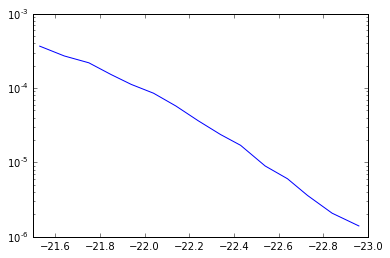

In [80]:
plt.semilogy(m, phi)
plt.xlim(-21.5, -23)
plt.ylim(1e-6, 1e-3)

In [58]:
np.exp()

1.000631880307906

In [81]:
def lumfunc(Mag, phis, alphas, M):
    return 0.4*np.log(10.)*phis*((10.**(0.4*(M-Mag)))**(alphas+1.))*(np.exp(-10.**(0.4*(M-Mag))))

In [83]:
lfcoef, lfcov = curve_fit(lumfunc, m[1:-1], phi[1:-1])
print lfcoef, lfcov

[ 1.  1.  1.] [[ inf  inf  inf]
 [ inf  inf  inf]
 [ inf  inf  inf]]


(1e-06, 0.001)

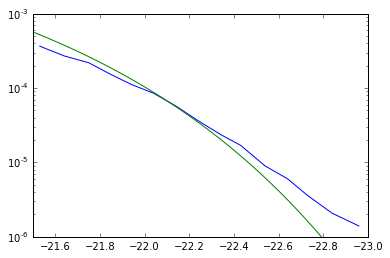

In [88]:
plt.semilogy(lf['col1'],lf['col2'])
mabs = np.linspace(-21.5, -23, 100)
plt.semilogy(mabs, lumfunc(mabs, 1.2e-2, -1.5, -20.5))
plt.xlim(-21.5, -23)
plt.ylim(1e-6, 1e-3)